In [1]:
import pandas as pd
#import plotly.plotly as py
#from plotly.graph_objs import *
#import plotly.figure_factory as ff
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import requests as rq
import zipfile as zf
import scipy.stats as sps
from scipy.stats import norm
#import seaborn as sns
import struct
#import Image
import scipy
import scipy.misc
import scipy.cluster
from io import StringIO
import urllib
import urllib3
import time
import colorsys
#from PIL import Image
#from PIL import ImageStat
import math
import csv
#import cv2 as cv
import os
import locale
import sklearn
import sklearn
import sklearn.decomposition
import sklearn.neighbors
import sklearn.datasets
import random
import scipy.stats as stats
#import statsmodels.api as sm
import matplotlib
import IPython
#import networkx as nx
#import bs4
import re
import datetime as dt
#patternS = re.compile("^\s+|\s*,\s*|\s+$—")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.decomposition import PCA

## Load and Clean Data

In [2]:
df = pd.read_table('data.txt')
df = df.drop(columns='Unnamed: 0', axis=1)
df = df[df['country'].isnull() == False]

country_list = []
for i in range(df.shape[0]):
    if (df['country'].tolist()[i].isdigit() == False) and (df['country'].tolist()[i].isalpha() == True):
        country_list.append(df['country'].tolist()[i])

df = df[df.country.isin(country_list)]

df['height'] = pd.to_numeric(df['height'],errors='coerce')
df['width'] = pd.to_numeric(df['width'],errors='coerce')
df = df[df['height'].isnull() == False]
df = df[df['width'].isnull() == False]

material_string = df['material']
material_string = material_string.str.lower()
df['material'] = material_string

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
famous_artists = ['Pablo Picasso', 'Andy Warhol', 'Gustav Klimt', 'Paul Cezanne', 'Edvard Munch', 'Vincent van Gogh', 'Mark Rothko']
df_famous_artists = df[df.artist.apply(lambda x: x in famous_artists)]
df_small_artists = df[df.artist.apply(lambda x: x not in famous_artists)]

In [4]:
df_small_artists['if_oil_on_canvas'] = df_small_artists.material.apply(lambda x: x=='oil_on_canvas').astype(int)
df_small_artists['if_sells_2000'] = df_small_artists.price.apply(lambda x: x > 2000).astype(int)
df_small_artists=pd.get_dummies(df_small_artists, columns=['country', 'FaceCount', 'dominantColor'])
df_small_artists = df_small_artists.drop(columns=['yearOfBirth', 'yearOfDeath', 'link', 'source', 'soldtime', 'year', 'name', 'material', 'artist', 'price'])

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jasonshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Train Test Split

In [5]:
y = df_small_artists.pop('if_sells_2000')
X = df_small_artists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

# Grid Search 

## Logistic Regression

In [6]:
lr_grid = {'C':[0.001,0.01,0.1,1,10],
        'penalty':['l1','l2']}

lr = LogisticRegression()

lr_gridsearch = GridSearchCV(lr,
                          lr_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1)

lr_gridsearch.fit(X_train, y_train)

lr_best_model = lr_gridsearch.best_estimator_

print (lr_best_model)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [7]:
lrclf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lrclf.fit(X_train, y_train)
lrclf_predicted = lrclf.predict(X_test)

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [8]:
lrclf_accuracy = lrclf.score(X_test, y_test)
print ('Accuracy : {}'.format(lrclf_accuracy))
lrclf_precision_recall_f1 = precision_recall_fscore_support(y_test, lrclf_predicted, average='binary')
print ('Precision : {}'.format(lrclf_precision_recall_f1[0]),
      'Recall : {}'.format(lrclf_precision_recall_f1[1]),
      'F1 Score : {}'.format(lrclf_precision_recall_f1[2]))

Accuracy : 0.6451324799047335
Precision : 0.695557963163597 Recall : 0.5555235073550621 F1 Score : 0.6177036561898653


In [9]:
lrclf_predicted_proba = lrclf.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrclf_predicted_proba[:, -1])

## Random Forest Classifier

In [10]:
rf_parameters = {'max_leaf_nodes':[35, 40, 45], 
              'n_estimators':[400, 500, 600],
             'max_depth': [10, 15, 20]}

In [11]:
rf = RandomForestClassifier()

rf_gridsearch = GridSearchCV(rf,
                             rf_parameters, 
                             cv=5, 
                             scoring='accuracy',
                             n_jobs=-1)

rf_gridsearch.fit(X_train, y_train)

rf_best_model = rf_gridsearch.best_estimator_

print (rf_best_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=45,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [12]:
rfclf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=45,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfclf = rfclf.fit(X_train, y_train)
rfclf_predicted = rfclf.predict(X_test)

In [13]:
rfclf_accuracy = rfclf.score(X_test, y_test)
print ('Accuracy : {}'.format(rfclf_accuracy))

rfclf_precision_recall_f1 = precision_recall_fscore_support(y_test, rfclf_predicted, average='binary')
print ('Precision : {}'.format(rfclf_precision_recall_f1[0]),
      'Recall : {}'.format(rfclf_precision_recall_f1[1]),
      'F1 Score : {}'.format(rfclf_precision_recall_f1[2]))

Accuracy : 0.6390294730574576
Precision : 0.6711563731931669 Recall : 0.589270262474762 F1 Score : 0.6275533712179389


In [14]:
rfclf_predicted_proba = rfclf.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfclf_predicted_proba[:, -1])

## Confusion Matrix

In [15]:
rfclf_confusion_matrix_df = pd.DataFrame(data=confusion_matrix(y_test, rfclf_predicted), index=['Actually Negative', 'Actually Positive'], columns=['Predicted Negative', 'Predicted Positive'])

In [16]:
rfclf_confusion_matrix_df

,Predicted Negative,Predicted Positive
Actually Negative,2250,1001
Actually Positive,1424,2043


## Random Forest Test Accuracy Improvement (tune number of trees)

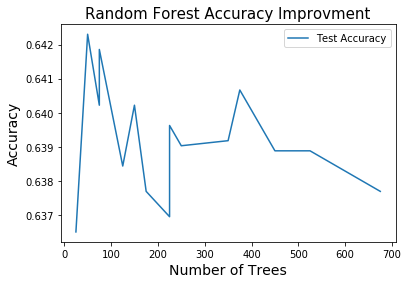

In [17]:
trees = np.sort([(25*j)*i for i in [1, 3, 5, 7, 9] for j in [1, 2, 3]])
test_accuracy_rf2 = []
for t in trees[:]:
    
    rfclf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=45,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=t, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

    rfclf2.fit(X_train, y_train)

    y_test_pred_rf2 = rfclf2.predict(X_test)
    
    test_accuracy_rf2.append(accuracy_score(y_test, y_test_pred_rf2))
    
plt.plot(trees[:],test_accuracy_rf2, label = 'Test Accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Trees', fontsize=14)
plt.title('Random Forest Accuracy Improvment', fontsize=15)
plt.legend()
plt.show()


It makes sense because random forest builds trees horizontally.

## Random Forest Feature Importance

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


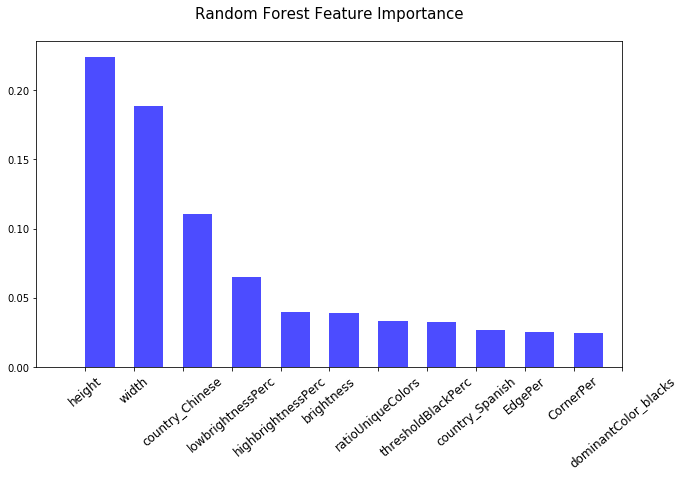

In [18]:
rfclf_importances = rfclf.feature_importances_
indices = np.argsort(rfclf_importances)[::-1]
feature_names = list(X_train.columns[indices])
f_num = len(feature_names)

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6, forward=True)

ax.set_title("Random Forest Feature Importance", fontsize=15)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.bar(range(f_num), rfclf_importances[indices], color="blue", align='edge', width=0.6, alpha=.7)
plt.xticks(range(f_num), feature_names, rotation=40, fontsize=12)
ax.set_xlim([-1, 11])
fig.show()

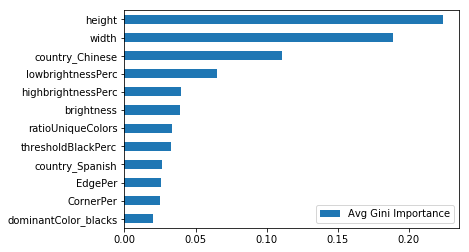

In [19]:
feature_scores_rf = pd.DataFrame({'Avg Gini Importance': rfclf.feature_importances_}, index=X_train.columns)
feature_scores_rf = feature_scores_rf.sort_values(by='Avg Gini Importance')
feature_scores_rf.iloc[-12:].plot(kind='barh');

## Adaptive Boosting Classifier

In [20]:
ada_boosting_grid = {'learning_rate': [0.15, 0.2, 0.25],
                     'n_estimators': [300, 400, 500]}

adab = AdaBoostClassifier()

ada_gridsearch = GridSearchCV(adab, 
                    ada_boosting_grid,
                    cv=5,
                    n_jobs=-1,
                    scoring='accuracy')

ada_gridsearch.fit(X_train, y_train)

best_adaclf_model = ada_gridsearch.best_estimator_
print (best_adaclf_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=300, random_state=None)


In [21]:
adabclf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=300, random_state=None)

adabclf.fit(X_train, y_train)

adabclf_predicted = adabclf.predict(X_test)

In [22]:
adabclf_accuracy = adabclf.score(X_test, y_test)
print ('Accuracy : {}'.format(adabclf_accuracy))

adabclf_precision_recall_f1 = precision_recall_fscore_support(y_test, adabclf_predicted, average='binary')
print ('Precision : {}'.format(adabclf_precision_recall_f1[0]),
      'Recall : {}'.format(adabclf_precision_recall_f1[1]),
      'F1 Score : {}'.format(adabclf_precision_recall_f1[2]))

Accuracy : 0.6457278952069068
Precision : 0.7004795278495021 Recall : 0.5477357946351312 F1 Score : 0.614762058918744


In [23]:
adabclf_predicted_proba = adabclf.predict_proba(X_test)
fpr_adab, tpr_adab, _ = roc_curve(y_test, adabclf_predicted_proba[:,-1])

## Confusion Matrix

In [24]:
adabclf_confusion_matrix_df = pd.DataFrame(data=confusion_matrix(y_test, adabclf_predicted), index=['Actually Negative', 'Actually Positive'], columns=['Predicted Negative', 'Predicted Positive'])

In [25]:
adabclf_confusion_matrix_df

,Predicted Negative,Predicted Positive
Actually Negative,2439,812
Actually Positive,1568,1899


## Ada Boosting Test Accuracy Improvement (tune number of trees)

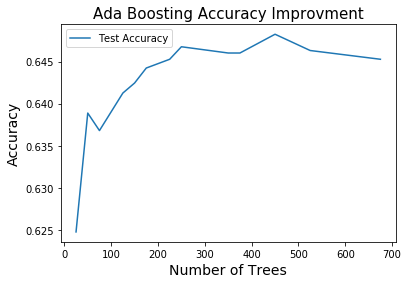

In [26]:
trees = np.sort([(25*j)*i for i in [1, 3, 5, 7, 9] for j in [1, 2, 3]])
test_accuracy_adab2 = []
for t in trees[:]:
    
    adabclf2 = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=t, random_state=None)

    adabclf2.fit(X_train, y_train)

    y_test_pred_adab2 = adabclf2.predict(X_test)
    
    test_accuracy_adab2.append(accuracy_score(y_test, y_test_pred_adab2))
    
plt.plot(trees[:],test_accuracy_adab2, label = 'Test Accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Trees', fontsize=14)
plt.title('Ada Boosting Accuracy Improvment', fontsize=15)
plt.legend()
plt.show()


ada boosting builds trees sequentially, so it makes sense that as number of trees grows accuracy improves.

## Ada Boosting Train Test Accuracy Improvement (number of trees is 300)

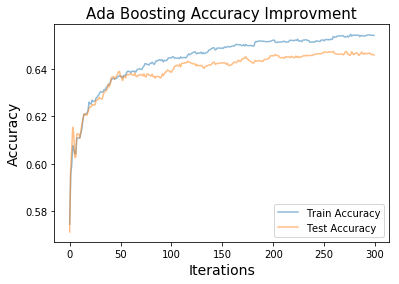

In [27]:
adabclf3 = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=300, random_state=None)

adabclf3.fit(X_train, y_train)

adab_train_scores = np.zeros((adabclf3.n_estimators,), dtype=np.float64)
adab_test_scores = np.zeros((adabclf3.n_estimators,), dtype=np.float64)

for i, y_train_pred in enumerate(adabclf3.staged_predict(X_train)):
    adab_train_scores[i] = accuracy_score(y_train, y_train_pred)

for i, y_test_pred in enumerate(adabclf3.staged_predict(X_test)):
    adab_test_scores[i] = accuracy_score(y_test, y_test_pred)

plt.plot(adab_train_scores, alpha=.5, label="Train Accuracy")
plt.plot(adab_test_scores, alpha=.5, label="Test Accuracy")
plt.title('Ada Boosting Accuracy Improvment', fontsize=15)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.legend()
plt.show()

## Adaptive Boosting Feature Importance

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


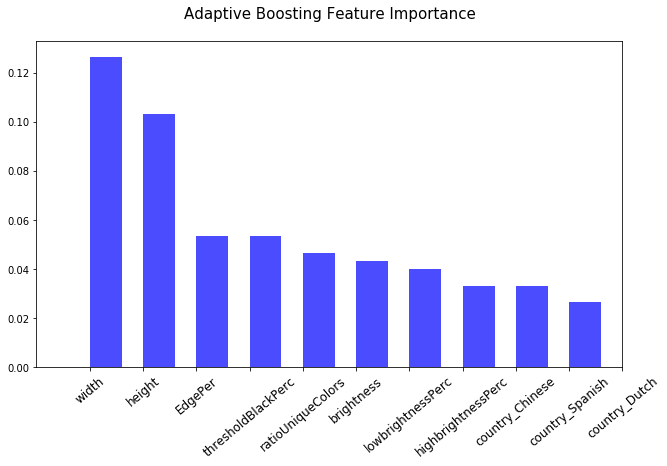

In [28]:
adabclf_importances = adabclf.feature_importances_
indices1 = np.argsort(adabclf_importances)[::-1]
feature_names1 = list(X.columns[indices1])
f_num1 = len(feature_names1)

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6, forward=True)

ax.set_title("Adaptive Boosting Feature Importance", fontsize=15)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.bar(range(f_num1), adabclf_importances[indices1], color="blue", align='edge', width=0.6, alpha=.7)
plt.xticks(range(f_num1), feature_names1, rotation=40, fontsize=12)
ax.set_xlim([-1, 10])
fig.show()

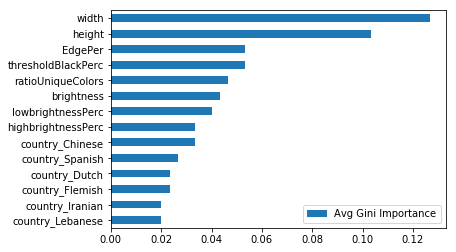

In [29]:
feature_scores_adab = pd.DataFrame({'Avg Gini Importance': adabclf.feature_importances_}, index=X_train.columns)
feature_scores_adab = feature_scores_adab.sort_values(by='Avg Gini Importance')
feature_scores_adab.iloc[-14:].plot(kind='barh');

## Gradient Boosting Classifier

In [30]:
gb_grid = {'learning_rate':[0.05, 0.08], 
              'n_estimators':[300, 400],
             'max_depth': [6, 8],
                'subsample': [0.7, 0.9]}

gb = GradientBoostingClassifier()

gb_gridsearch = GridSearchCV(gb, 
                             gb_grid, 
                             cv=5, 
                             scoring='accuracy',
                             n_jobs=-1)

gb_gridsearch.fit(X_train, y_train)

best_gb_model = gb_gridsearch.best_estimator_
print (best_gb_model)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.7, verbose=0,
              warm_start=False)


In [37]:
gbclf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.7, verbose=0,
              warm_start=False)

gbclf.fit(X_train, y_train)

gbclf_predicted = gbclf.predict(X_test)

In [38]:
gbclf_accuracy = gbclf.score(X_test, y_test)
print ('Accuracy : {}'.format(gbclf_accuracy))

gbclf_precision_recall_f1 = precision_recall_fscore_support(y_test, gbclf_predicted)
print ('Precision : {}'.format(gbclf_precision_recall_f1[0][1]),
      'Recall : {}'.format(gbclf_precision_recall_f1[1][1]),
      'F1 Score : {}'.format(gbclf_precision_recall_f1[2][1]))

Accuracy : 0.6534682941351593
Precision : 0.6940374787052811 Recall : 0.5875396596481107 F1 Score : 0.6363636363636364


In [39]:
gbclf_predicted_proba = gbclf.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbclf_predicted_proba[:, -1])

## Confusion Matrix

In [40]:
gbclf_confusion_matrix_df = pd.DataFrame(data=confusion_matrix(y_test, gbclf_predicted), index=['Actually Negative', 'Actually Positive'], columns=['Predicted Negative', 'Predicted Positive'])

In [41]:
gbclf_confusion_matrix_df

,Predicted Negative,Predicted Positive
Actually Negative,2353,898
Actually Positive,1430,2037


## Gradient Boosting Test Accuracy Improvement (tune number of trees)

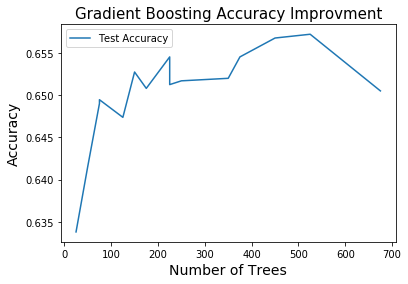

In [43]:
trees = np.sort([(25*j)*i for i in [1, 3, 5, 7, 9] for j in [1, 2, 3]])
test_accuracy_gbclf2 = []
for t in trees[:]:
    
    gbclf2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=t,
              presort='auto', random_state=None, subsample=0.7, verbose=0,
              warm_start=False)

    gbclf2.fit(X_train, y_train)

    y_test_pred_gbclf2 = gbclf2.predict(X_test)
    
    test_accuracy_gbclf2.append(accuracy_score(y_test, y_test_pred_gbclf2))
    
plt.plot(trees[:],test_accuracy_gbclf2, label = 'Test Accuracy')
plt.title('Gradient Boosting Accuracy Improvment', fontsize=15)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Trees', fontsize=14)
plt.legend()
plt.show()


## Gradient Boosting Train Test Accuracy Improvement (number of trees is 300)

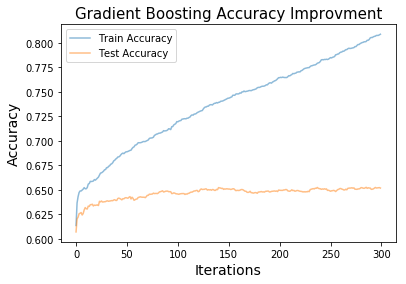

In [44]:
gbclf3 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.7, verbose=0,
              warm_start=False)

gbclf3.fit(X_train, y_train)

gb_train_scores = np.zeros((gbclf3.n_estimators,), dtype=np.float64)
gb_test_scores = np.zeros((gbclf3.n_estimators,), dtype=np.float64)

for i, y_train_pred in enumerate(gbclf3.staged_predict(X_train)):
    gb_train_scores[i] = accuracy_score(y_train, y_train_pred)

for i, y_test_pred in enumerate(gbclf3.staged_predict(X_test)):
    gb_test_scores[i] = accuracy_score(y_test, y_test_pred)

plt.plot(gb_train_scores, alpha=.5, label="Train Accuracy")
plt.plot(gb_test_scores, alpha=.5, label="Test Accuracy")
plt.title('Gradient Boosting Accuracy Improvment', fontsize=15)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.legend()
plt.show()

## Gradient Boosting Feature Importance

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


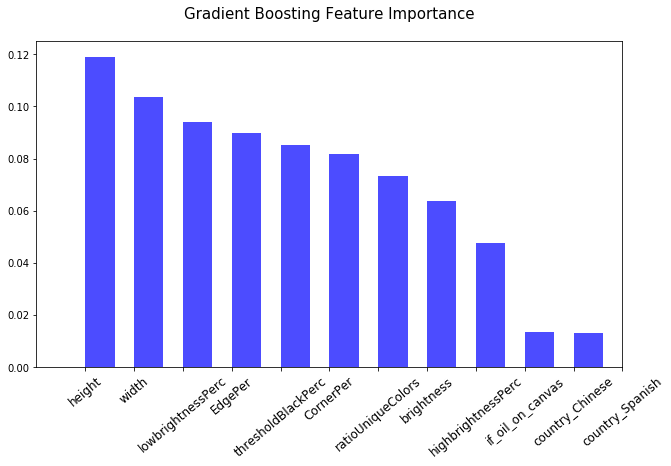

In [45]:
gb_importances = gbclf.feature_importances_
indices2 = np.argsort(gb_importances)[::-1]
feature_names2 = list(X_train.columns[indices2])
f_num2 = len(feature_names2)

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6, forward=True)

ax.set_title("Gradient Boosting Feature Importance", fontsize=15)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.bar(range(f_num2), gb_importances[indices2], color="blue", align='edge', width=0.6, alpha=.7)
plt.xticks(range(f_num2), feature_names2, rotation=40, fontsize=12)
ax.set_xlim([-1, 11])
fig.show()

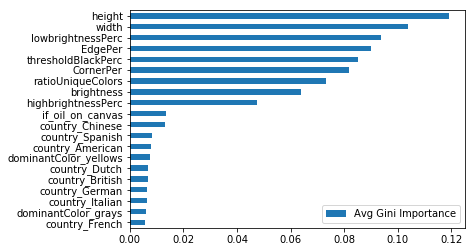

In [46]:
feature_scores_gb = pd.DataFrame({'Avg Gini Importance': gbclf.feature_importances_}, index=X_train.columns)
feature_scores_gb = feature_scores_gb.sort_values(by='Avg Gini Importance')
feature_scores_gb.iloc[-20:].plot(kind='barh');

## Gradient Boosting Partial Dependence

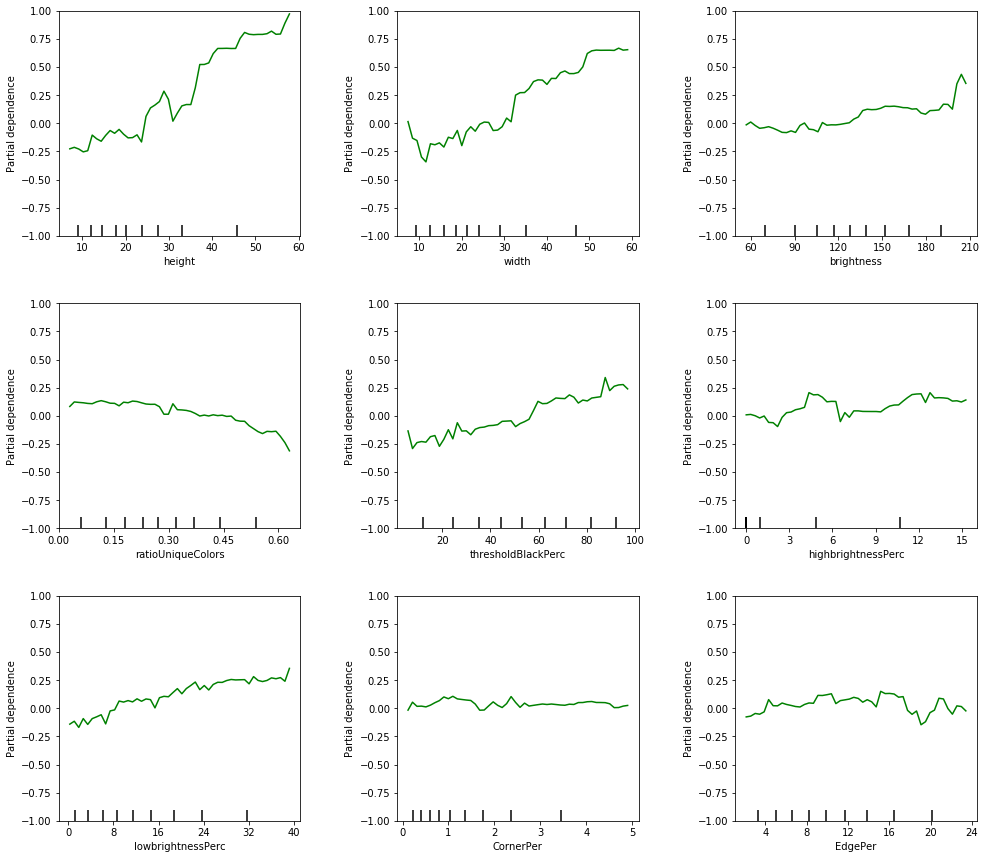

In [47]:
names = X_train.columns
features = [0,1,2,3,4,5,6,7,8]

fig, axs = plot_partial_dependence(gbclf, X_train, features,
                                       feature_names=names,
                                       n_jobs=-1, grid_resolution=50, label='1')
for x in axs:
    x.set_ylim(-1, 1)
fig.set_size_inches(15, 15, forward=True)
plt.subplots_adjust(top=0.9)

## Models Ensemble Voting Classifier

In [48]:
ensembleclf = VotingClassifier(estimators=[('rf', rfclf), ('gdb', gbclf),('ada', adabclf)], voting='soft')
ensembleclf.fit(X_train, y_train)
ensemble_predicted = ensembleclf.predict(X_test)

/Users/jasonshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
ensemble_accuracy = ensembleclf.score(X_test, y_test)
print ('Accuracy : {}'.format(ensemble_accuracy))

ensembleclf_precision_recall_f1 = precision_recall_fscore_support(y_test, ensemble_predicted, average='binary')
print ('Precision : {}'.format(ensembleclf_precision_recall_f1[0]),
      'Recall : {}'.format(ensembleclf_precision_recall_f1[1]),
      'F1 Score : {}'.format(ensembleclf_precision_recall_f1[2]))

Accuracy : 0.6554033938672224
Precision : 0.6968557758031442 Recall : 0.5881165272569945 F1 Score : 0.6378851869231973


/Users/jasonshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
ensembleclf_predicted_prob = ensembleclf.predict_proba(X_test)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensembleclf_predicted_prob[:, -1])

## Confusion Matrix

In [51]:
ensembleclf_confusion_matrix_df = pd.DataFrame(data=confusion_matrix(y_test, ensemble_predicted), index=['Actually Negative', 'Actually Positive'], columns=['Predicted Negative', 'Predicted Positive'])

In [52]:
ensembleclf_confusion_matrix_df

,Predicted Negative,Predicted Positive
Actually Negative,2364,887
Actually Positive,1428,2039


## Model Comparison

In [53]:
model_data = {'Precision': [lrclf_precision_recall_f1[0], rfclf_precision_recall_f1[0], adabclf_precision_recall_f1[0], gbclf_precision_recall_f1[0][1], ensembleclf_precision_recall_f1[0]], 
        'Recall': [lrclf_precision_recall_f1[1], rfclf_precision_recall_f1[1], adabclf_precision_recall_f1[1], gbclf_precision_recall_f1[1][1], ensembleclf_precision_recall_f1[1]], 
        'F1 Score': [lrclf_precision_recall_f1[2], rfclf_precision_recall_f1[2], adabclf_precision_recall_f1[2], gbclf_precision_recall_f1[2][1], ensembleclf_precision_recall_f1[2]],
        'Accuracy': [lrclf_accuracy, rfclf_accuracy, adabclf_accuracy, gbclf_accuracy, ensemble_accuracy], 
              }
df_compare = pd.DataFrame(model_data, index = ['Logistic Regression', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Ensemble'], columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy']).round(3)
df_compare

,Precision,Recall,F1 Score,Accuracy
Logistic Regression,0.696,0.556,0.618,0.645
Random Forest,0.671,0.589,0.628,0.639
Ada Boosting,0.700,0.548,0.615,0.646
Gradient Boosting,0.694,0.588,0.636,0.653
Ensemble,0.697,0.588,0.638,0.655


## ROC Curve

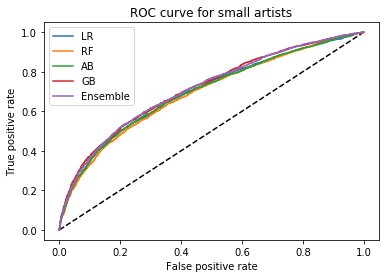

In [54]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_adab, tpr_adab, label='AB')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.plot(fpr_ensemble, tpr_ensemble, label='Ensemble')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for small artists')
plt.legend(loc='best')
plt.show()

## PCA

In [55]:
pca = PCA(n_components=134)
pca.fit(X_train.values)

PCA(copy=True, iterated_power='auto', n_components=134, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
small_artists_reduced = np.dot(X_train.values, pca.components_.T)

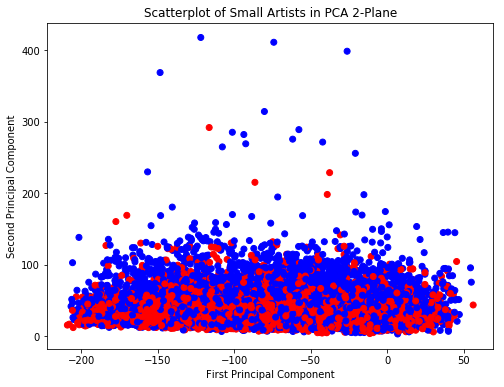

In [57]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(small_artists_reduced[:, 0], small_artists_reduced[:, 1], 
           color=np.array(["red", "blue"])[y_train])
ax.set_title("Scatterplot of Small Artists in PCA 2-Plane")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component");

First two principle components are not helpful.